## ExMAS
> Equilibrium matching


In [2]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.display import display
pd.options.display.max_columns = None

In [4]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching
from ExMAS.extras import games, pricings, prunings, pipeline

In [5]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/game/ams.json') # load the default 
params.t0 = pd.to_datetime(params.t0)
params.matching_obj = 'u_pax'
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [6]:
params.nP = 50
params.simTime = 0.1
params.shared_discount = 0.3
inData = ExMAS.utils.generate_demand(inData, params)  # generate requests

In [7]:
params.veh_cost = 2.3 * params.VoT / params.avg_speed  # operating costs per kilometer
params.fixed_ride_cost = 1  # ride fixed costs (per vehicle)
params.time_cost = params.VoT  # travellers' cost per travel time
params.wait_cost = params.time_cost * 1.5  # and waiting
params.sharing_penalty_fixed = 0  # fixed penalty (EUR) per
params.sharing_penalty_multiplier = 0  # fixed penalty (EUR) per

In [8]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [9]:
from ExMAS.main import init_log
params.logger_level = 'INFO'
inData.logger = init_log(params)

In [10]:
inData = ExMAS.main(inData, params, plot = False)
KPIs = inData.sblts.res.to_frame('u_pax')

11-02-21 10:02:42-INFO-Initializing pairwise trip shareability between 50 and 50 trips.
11-02-21 10:02:42-INFO-creating combinations
11-02-21 10:02:42-INFO-2450	 nR*(nR-1)
11-02-21 10:02:42-INFO-Reduction of feasible pairs by 96.90%
11-02-21 10:02:42-INFO-Degree 2 	Completed
11-02-21 10:02:42-INFO-trips to extend at degree 2 : 172
11-02-21 10:02:42-INFO-At degree 2 feasible extensions found out of 152 searched
11-02-21 10:02:42-INFO-Degree 3 	Completed
11-02-21 10:02:42-INFO-trips to extend at degree 3 : 152
11-02-21 10:02:43-INFO-At degree 3 feasible extensions found out of 64 searched
11-02-21 10:02:43-INFO-Degree 4 	Completed
11-02-21 10:02:43-INFO-trips to extend at degree 4 : 64
11-02-21 10:02:43-INFO-At degree 4 feasible extensions found out of 8 searched
11-02-21 10:02:43-INFO-Degree 5 	Completed
11-02-21 10:02:43-INFO-trips to extend at degree 5 : 8
11-02-21 10:02:43-INFO-At degree 5 feasible extensions found out of 0 searched
11-02-21 10:02:43-INFO-Degree 6 	Completed
11-02-21

In [11]:
inData = games.prepare_PoA(inData)

11-02-21 10:02:54-WARNING-Prepare for game:  1/6
11-02-21 10:02:54-WARNING-Prepare for game:  2/6
11-02-21 10:02:55-WARNING-Prepare for game:  3/6
11-02-21 10:02:55-WARNING-Prepare for game:  4/6
11-02-21 10:03:03-WARNING-Prepare for game:  5/6
11-02-21 10:03:03-WARNING-Prepare for game:  6/6


In [12]:
inData.sblts.rides.tail(4)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected,treqs,deps,delays,ttravs,pruned,indexes_set,subgroups,supergroups,rankings,mean_ranking,rel_rankings,mean_rel_ranking,PoAs,mean_PoA,total_PoA,squared_PoA,probs,min_prob,logsum_prob
442,"[47, 21, 38, 17, 41]",57.663725,1504,52,"[12.654774999999999, 15.444274999999998, 9.813...","[212.5, 88, 164, 40, 258, 437, 80, 70, 143, 224]","[47, 21, 38, 17, 41]","[47, 38, 17, 41, 21]",5,442,0.612770,3884,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[341, 157, 260, 122, 286]","[212.5, 300.5, 464.5, 504.5, 762.5]","[-128.5, 143.5, 204.5, 382.5, 476.5]","[987, 1416, 1028, 1212, 954]",True,"{38, 41, 47, 17, 21}","[17, 21, 38, 41, 47, 91, 92, 93, 135, 136, 141...",[442],"[80.0, 60.0, 54.0, 110.0, 58.0]",72.4,"[0.9411764705882353, 0.7142857142857143, 0.5, ...",0.754672,"[1.5999999999999996, 1.5999999999999996, 0.800...",1.34,6.7,1.906,"[5.271791641978604e-08, 6.552346746632373e-08,...",2.015255e-08,-71.693696
443,"[21, 25, 38, 17, 41]",55.928425,1438,52,"[15.653574999999996, 11.178825, 10.164175, 10....","[168.5, 25, 171, 40, 258, 403, 104, 70, 143, 224]","[21, 25, 38, 17, 41]","[25, 38, 17, 41, 21]",5,443,0.625521,3840,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[157, 190, 260, 122, 286]","[168.5, 193.5, 364.5, 404.5, 662.5]","[11.5, 3.5, 104.5, 282.5, 376.5]","[1438, 976, 1018, 1202, 944]",True,"{38, 41, 17, 21, 25}","[17, 21, 25, 38, 41, 91, 92, 107, 108, 109, 11...","[440, 441, 443, 444]","[73.0, 52.0, 81.0, 89.0, 26.0]",64.2,"[0.8690476190476191, 0.49523809523809526, 0.75...",0.638157,"[1.8999999999999986, 0.7999999999999989, 1.199...",1.14,5.7,1.498,"[3.2622213544453686e-09, 5.324673847801706e-05...",3.262221e-09,-62.775959
444,"[21, 25, 17, 38, 41]",55.700925,1532,52,"[15.944774999999996, 11.169725, 9.614674999999...","[168.5, 25, 195, 40, 262, 403, 101, 69, 213, 224]","[21, 25, 17, 38, 41]","[25, 17, 38, 41, 21]",5,444,0.601042,3840,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[157, 190, 122, 260, 286]","[168.5, 193.5, 388.5, 428.5, 690.5]","[11.5, 3.5, 266.5, 168.5, 404.5]","[1532, 1001, 1088, 1272, 1010]",True,"{38, 41, 17, 21, 25}","[17, 21, 25, 38, 41, 91, 92, 107, 108, 109, 11...","[440, 441, 443, 444]","[78.0, 53.0, 33.0, 62.0, 71.0]",59.4,"[0.9285714285714286, 0.5047619047619047, 0.292...",0.617666,"[2.0999999999999996, 0.7999999999999989, 0.400...",1.08,5.4,1.492,"[4.414936509843902e-10, 5.324673847801706e-05,...",4.414937e-10,-59.775959
445,"[25, 38, 17, 3, 41]",54.835900,1338,50,"[12.1002, 10.434899999999999, 10.5224, 12.8047...","[147.0, 171, 40, 62, 250, 450, 64, 101, 153, 47]","[25, 38, 17, 3, 41]","[38, 25, 17, 3, 41]",5,445,0.633123,3647,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[190, 260, 122, 20, 286]","[147.0, 318.0, 358.0, 420.0, 670.0]","[-43.0, 58.0, 236.0, 400.0, 384.0]","[1037, 866, 1127, 1065, 815]",True,"{3, 38, 41, 17, 25}","[3, 17, 25, 38, 41, 61, 63, 88, 91, 92, 106, 1...","[438, 439, 445]","[102.0, 100.0, 92.0, 65.0, 59.0]",83.6,"[0.9714285714285714, 0.9259259259259259, 0.814...",0.844467,"[1.6999999999999993, 1.4000000000000004, 1.300...",1.42,7.1,2.062,"[6.571169563826747e-09, 2.9318081373886194e-07...",6.571170e-09,-76.820429


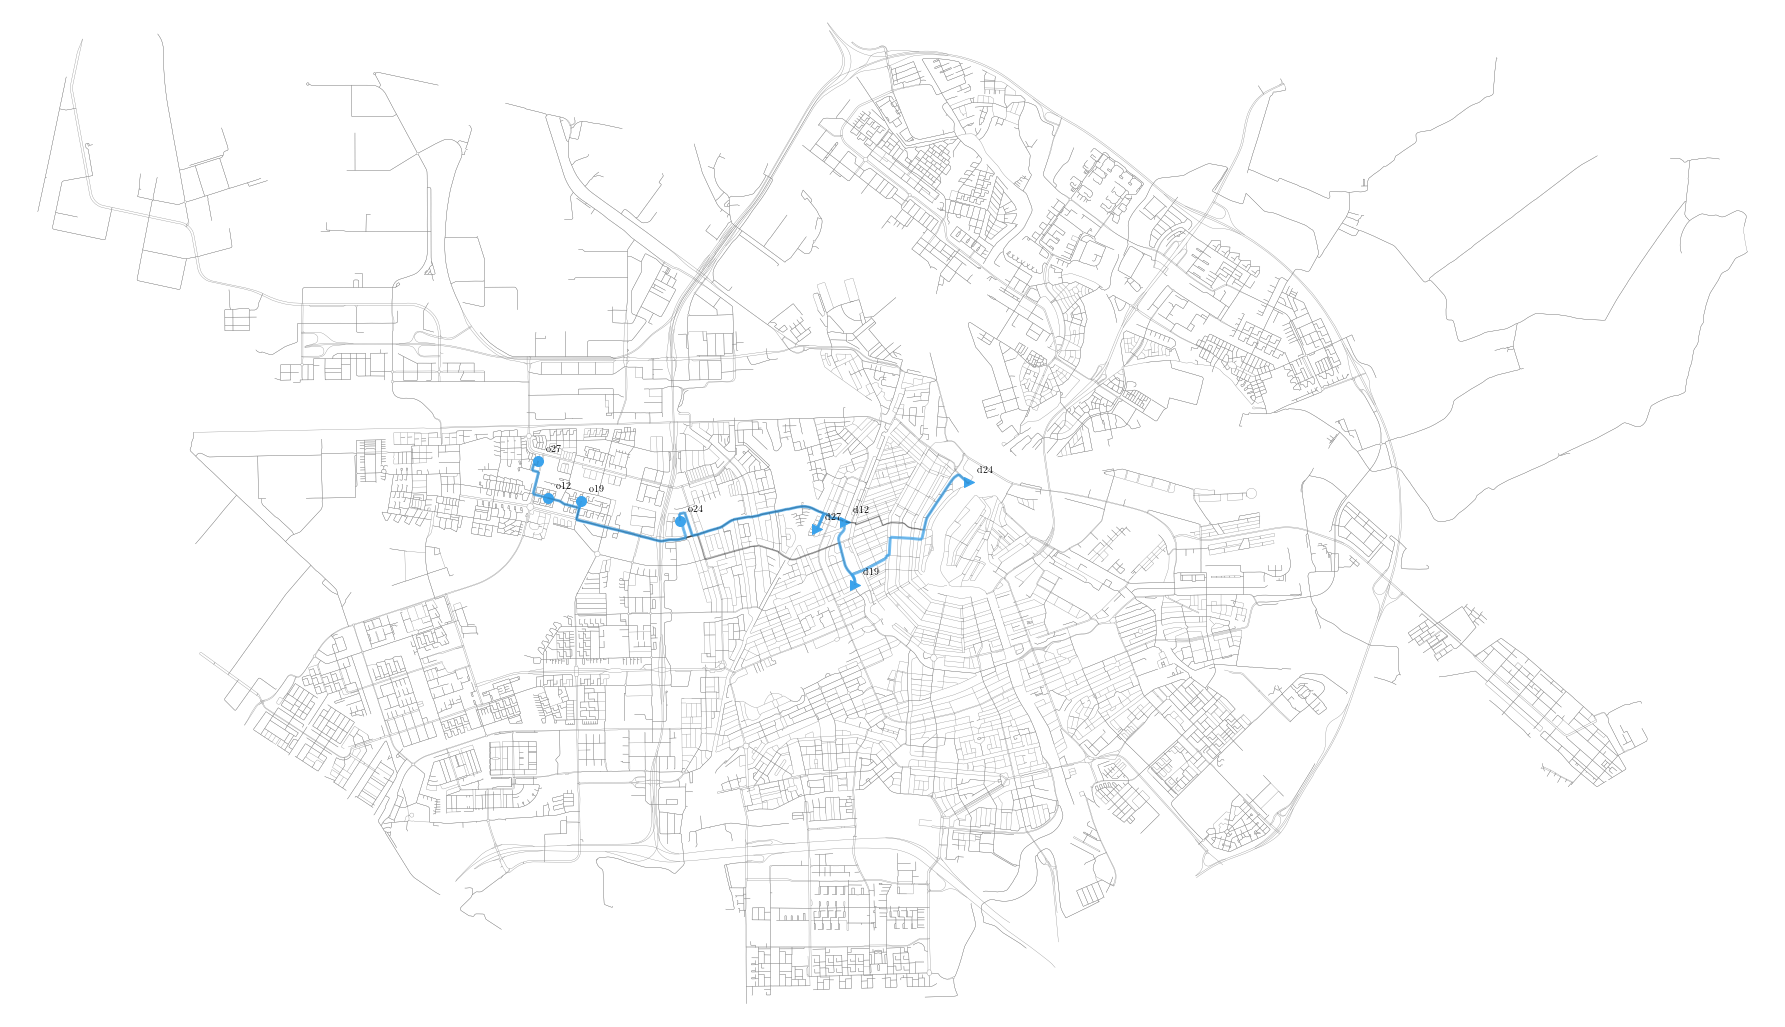

In [112]:
ExMAS.utils.plot_map_rides(inData,[394], light = False, m_size = 100)

In [20]:

params.time_cost = params.VoT # travellers' cost per travel time
params.wait_cost = params.time_cost*1.5 # and waiting
params.sharing_penalty_fixed = 0 # fixed penalty (EUR) per 
params.sharing_penalty_multiplier = 0.2 # fixed penalty (EUR) per 

params.veh_cost = 2.3*params.VoT/params.avg_speed # operating costs per kilometer
params.fixed_ride_cost = 1 # ride fixed costs (per vehicle)

In [21]:
inData = ExMAS.extras.pricings.update_costs(inData, params)
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split(inData) 

In [122]:
table_1 = inData.sblts.rides_multi_index.loc[394][['ttrav_sh','delay','cost_user','cost_single','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']]
table_1.delay = table_1.delay.apply(lambda x: min(237,abs(x)))
table_1.columns = ['$t_i(G)$', '$w_i(G)$', '$C(G,i)$', '$C(\{i\},i)$', '$C_i(G)$ uniform',
       '$C_i(G)$ externality-based', '$C_i(G)$ residual', '$C_i(G)$ subgroup-based']                                             

print(table_1.round(2).to_latex())
table_1

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  \$t\_i(G)\$ &  \$w\_i(G)\$ &  \$C(G,i)\$ &  \$C(\textbackslash \{i\textbackslash \},i)\$ &  \$C\_i(G)\$ uniform &  \$C\_i(G)\$ externality-based &  \$C\_i(G)\$ residual &  \$C\_i(G)\$ subgroup-based \\
\midrule
27 &       709 &      97.0 &      3.49 &          7.61 &              6.89 &                        7.57 &               7.23 &                     6.77 \\
12 &       772 &     112.0 &      3.83 &          6.69 &              6.89 &                        4.20 &               6.36 &                     6.69 \\
19 &       994 &     126.0 &      4.84 &          7.24 &              6.89 &                        6.65 &               6.87 &                     6.08 \\
24 &       752 &     237.0 &      4.99 &          7.49 &              6.89 &                       10.44 &               7.12 &                     8.04 \\
\bottomrule
\end{tabular}



,$t_i(G)$,$w_i(G)$,"$C(G,i)$","$C(\{i\},i)$",$C_i(G)$ uniform,$C_i(G)$ externality-based,$C_i(G)$ residual,$C_i(G)$ subgroup-based
27,709,97.0,3.48705,7.60660,6.893438,7.566475,7.225312,6.768228
12,772,112.0,3.83040,6.69415,6.893438,4.198250,6.358599,6.686412
19,994,126.0,4.83630,7.23700,6.893438,6.651400,6.874238,6.077088
24,752,237.0,4.98540,7.49110,6.893438,10.440850,7.115601,8.042022


In [123]:
l = table_1.sum().values
[print(str(round(_,2)) + ' & ') for _ in l]

3227.0 & 
572.0 & 
17.14 & 
29.03 & 
27.57 & 
28.86 & 
27.57 & 
27.57 & 


[None, None, None, None, None, None, None, None]

In [127]:
[inData.sblts.rides.loc[394].u_veh,inData.sblts.rides.loc[394].costs_veh]

[1172, 10.4346]

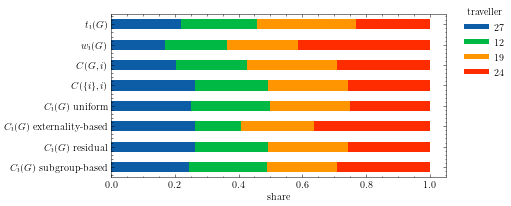

In [125]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, ax = plt.subplots(figsize = (6,3))
from matplotlib.lines import Line2D
to_plot = table_1/table_1.sum()
to_plot = to_plot[to_plot.columns[::-1]]
to_plot.T.plot.barh(stacked = True, legend = False, ax = ax)
ax.set_xlabel('share')
custom = [Line2D([], [], marker='', color=colors[i], lw = 5, linestyle='-') for i in [0,1,2,3]]

ax.legend(custom, to_plot.index.values, loc='upper right',bbox_to_anchor=(1.2, 1.1), title = 'traveller')  
plt.savefig('ride_bars.png', dpi = 600)

### incidence matrix
rows are trips columns are rides,
1 if trip blongs to a ride, 0 otherwise

### parameters

eq. 1 , eq.2

In [34]:
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split_bas(inData) 

04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No LaTeX-compatible font found for the serif font family in rcParams. Using default.
04-02-21 14:40:06-INFO-No La

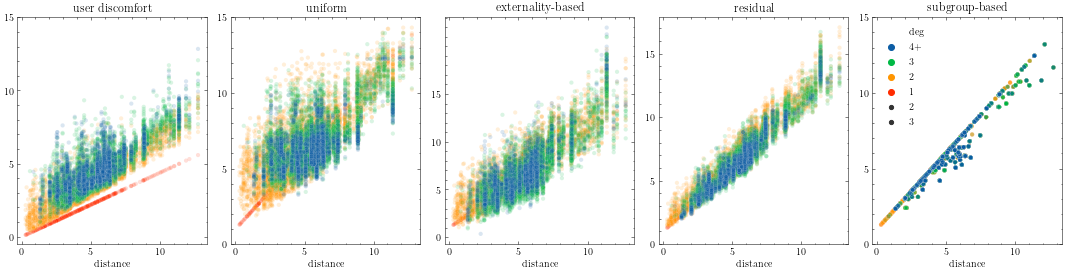

In [39]:
df = inData.sblts.rides_multi_index
#palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
titles = ['user discomfort','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(1,len(cols), figsize = (len(cols)*3,4), sharey=False)
df = inData.sblts.rides_multi_index
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000

for i,col in enumerate(cols):
    
    
    axes[i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[i], hue = 'deg', size = 3,
                    hue_order=["4+", "3",'2','1'],
                    alpha = 0.15, 
                    #palette = palette,
                   linewidth=0.3)
    axes[i].set_ylabel('')
    axes[i].set_xticks([0,5, 10])
    axes[i].set_yticks([0,5,10,15])
    if i<len(cols)-1:
        axes[i].get_legend().remove()
plt.tight_layout() 
#plt.savefig('f3.tiff', dpi = 600)
plt.savefig('f3.png', dpi = 300)
#plt.savefig('f3.pdf', rasterized = True)

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
inData.sblts['min_cost'] = rides_multi_index.groupby('traveller').cost_user.min()

traveller
0      2.7090
1      1.8165
2      0.7315
3      0.8120
4      0.6755
        ...  
395    2.6530
396    5.3095
397    1.8130
398    1.9460
399    2.1000
Name: cost_user, Length: 400, dtype: float64

### pricings with various strategies

In [ ]:
inData = ExMAS.extras.pricings.update_costs(inData, params)
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split_bas(inData) 
rs = inData.sblts.rides.sample(4).index
plt.rcParams['figure.figsize'] = [12,12]
fig, ax = plt.subplots()
scatter_matrix(inData.sblts.rides_multi_index[['dist', 'ttrav_sh', 'UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP', 'total_group_cost']], grid = False, diagonal = 'kde', alpha = 0.2, ax = ax)
fig.suptitle('correlations between various prices and features')
inData.sblts.rides_multi_index.loc[rs,:]

# Differences between algorithms and pricings

## TNE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TNE, PRICING = PRICING, ALGO = 'TNE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## Hermetic

In [ ]:
ret = dict()
params.logger_level = 'WARNING'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_HERMETIC, PRICING = PRICING, ALGO = 'HERMETIC', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## RUE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RUE, PRICING = PRICING, ALGO = 'RUE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## RSIE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RSIE, PRICING = PRICING, ALGO = 'RSIE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

## TSE

In [ ]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TSE, PRICING = PRICING, ALGO = 'TSE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

---
(c) Rafał Kucharski, Delft, 2020